# Queston-1

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [2]:
def convolution2d(img, fil, s=1, padding=True):
    fil_size = fil.shape[0]
    if padding:
        pad_size = fil_size//2
        img = np.pad(img,(pad_size,pad_size),mode='edge')

    h,w = img.shape[0],img.shape[1]
    
    rows = (h - fil_size)//s +1
    cols = (w - fil_size)//s +1
    out = np.zeros((rows,cols))
    
    for i in range(rows):
        for j in range(cols):

            curr = img[i:i+fil_size,j:j+fil_size]
            out[i,j] = np.sum(np.multiply(curr,fil))

            
    return out.astype(np.uint8) 

## Part-1

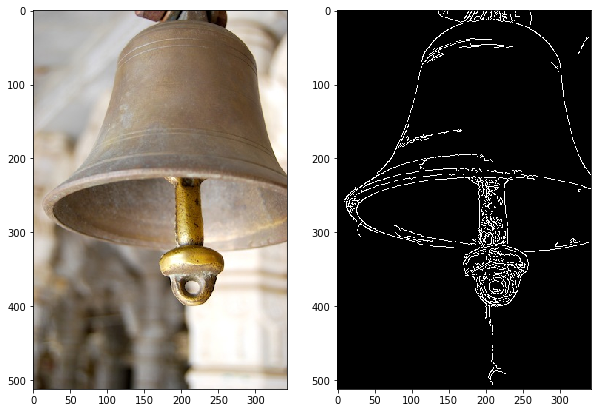

In [3]:
img = cv2.imread('../A2_resources/bell.jpg')

out = cv2.Canny(img,40,200)

img_rgb = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
fig = plt.figure()
fig.set_size_inches(10, 10)
fig.add_subplot(121)
plt.imshow(img_rgb)
plt.subplot(1,2,2)
plt.imshow(out,'gray')

plt.show()

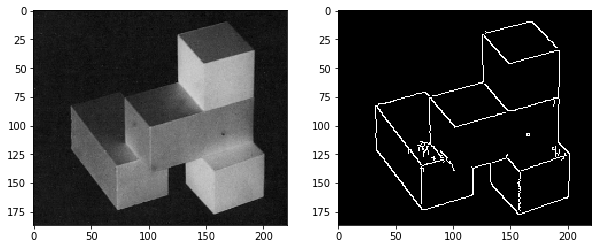

In [4]:
img = cv2.imread('../A2_resources/cubes.png')
# filt = np.array([[0,-1,0],[0,0,0],[0,1,0]])
out = cv2.Canny(img,40,190)

img_rgb = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
fig = plt.figure()
fig.set_size_inches(10, 10)
fig.add_subplot(121)
plt.imshow(img_rgb)
plt.subplot(1,2,2)
plt.imshow(out,'gray')

plt.show()

## Part-2

In [5]:
sobelx = np.array([[-1,0,1],[-2,0,2],[-1,0,1]])
sobely = np.array([[-1,-2,-1],[0,0,0],[1,2,1]])

prewittx = np.array([[-1,0,1],[-1,0,1],[-1,0,1]])
prewitty = np.array([[-1,-1,-1],[0,0,0],[1,1,1]])

robertsx = np.array([[0,1],[-1,0]])
robertsy = np.array([[1,0],[0,-1]])

laplacianx = np.array([[0,1,0],[1,-4,1],[0,1,0]])
laplaciany = np.array([[1,1,1],[1,-8,1],[1,1,1]])


In [6]:
img = cv2.cvtColor(cv2.imread('../A2_resources/barbara.jpg'),cv2.COLOR_BGR2GRAY)
out1 = convolution2d(img,sobelx)
out2 = convolution2d(img,sobely)
out3 = convolution2d(img,prewittx)
out4 = convolution2d(img,prewitty)
out5 = convolution2d(img,robertsx)
out6 = convolution2d(img,robertsy)
out7 = convolution2d(img,laplacianx)
out8 = convolution2d(img,laplaciany)
out = cv2.Canny(img,50,200)

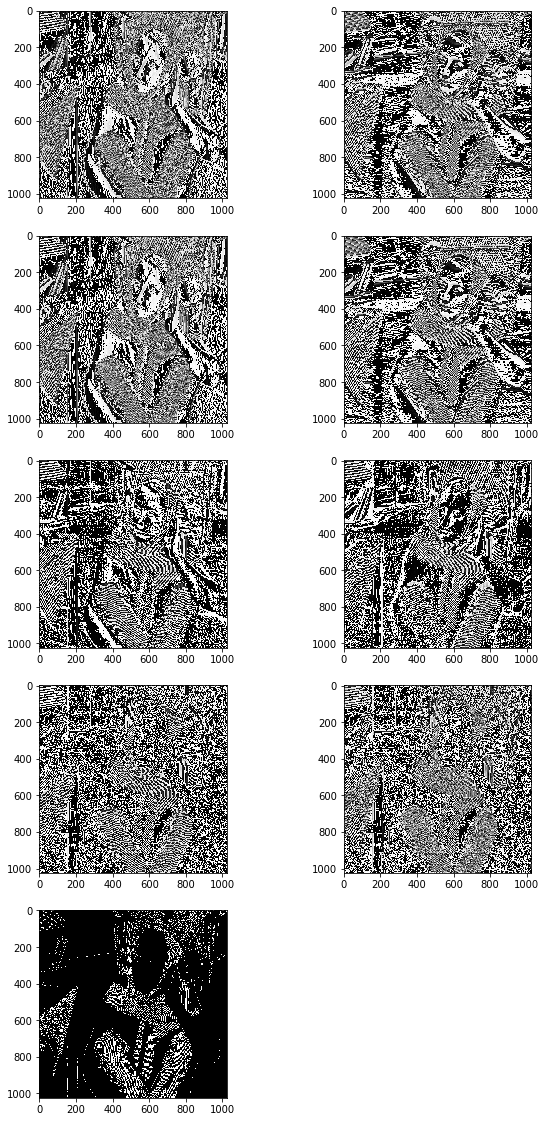

In [7]:
fig = plt.figure()
fig.set_size_inches(10,20)
fig.add_subplot(521)
# plt.imshow(img,'gray')
# plt.subplot(3,3,2)
plt.imshow(out1,'gray')
plt.subplot(5,2,2)
plt.imshow(out2,'gray')
plt.subplot(5,2,3)
plt.imshow(out3,'gray')
plt.subplot(5,2,4)
plt.imshow(out4,'gray')
plt.subplot(5,2,5)
plt.imshow(out5,'gray')
plt.subplot(5,2,6)
plt.imshow(out6,'gray')
plt.subplot(5,2,7)
plt.imshow(out7,'gray')
plt.subplot(5,2,8)
plt.imshow(out8,'gray')
plt.subplot(5,2,9)
plt.imshow(out,'gray')
plt.show()

## Part-3

In [8]:
img = cv2.cvtColor(cv2.imread('../A2_resources/barbara.jpg'),cv2.COLOR_BGR2GRAY)
noise = np.random.normal(0,1,img.size)
img = img + noise.reshape(img.shape)
out1 = convolution2d(img,sobelx)
out2 = convolution2d(img,sobely)
out3 = convolution2d(img,prewittx)
out4 = convolution2d(img,prewitty)
out5 = convolution2d(img,robertsx)
out6 = convolution2d(img,robertsy)
out7 = convolution2d(img,laplacianx)
out8 = convolution2d(img,laplaciany)


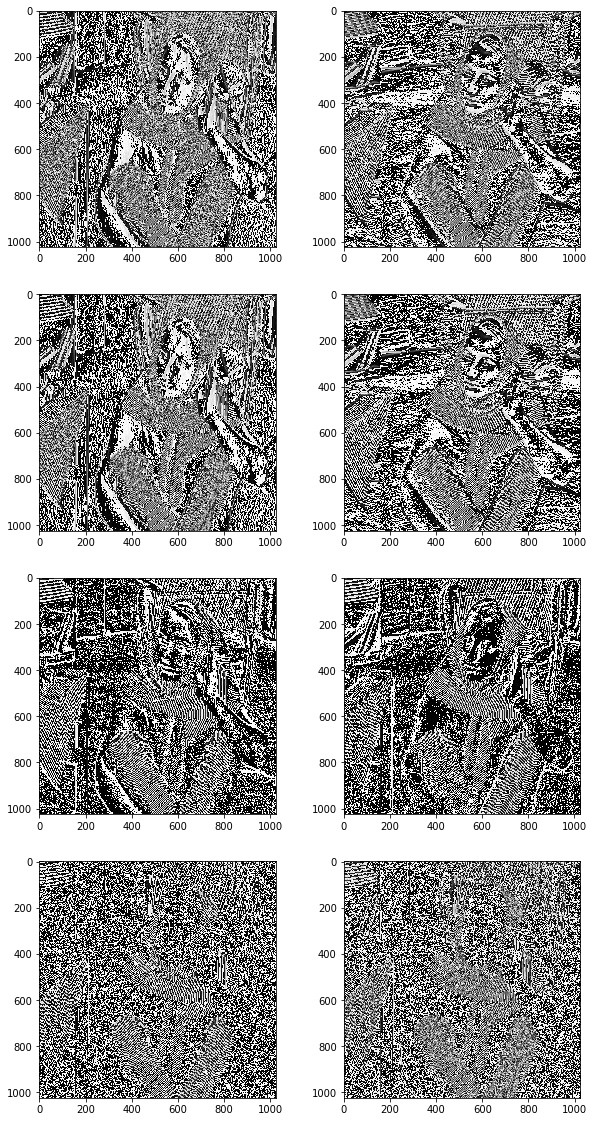

In [9]:
fig = plt.figure()
fig.set_size_inches(10,20)
fig.add_subplot(421)
# plt.imshow(img,'gray')
# plt.subplot(3,3,2)
plt.imshow(out1,'gray')
plt.subplot(4,2,2)
plt.imshow(out2,'gray')
plt.subplot(4,2,3)
plt.imshow(out3,'gray')
plt.subplot(4,2,4)
plt.imshow(out4,'gray')
plt.subplot(4,2,5)
plt.imshow(out5,'gray')
plt.subplot(4,2,6)
plt.imshow(out6,'gray')
plt.subplot(4,2,7)
plt.imshow(out7,'gray')
plt.subplot(4,2,8)
plt.imshow(out8,'gray')


plt.show()

The results didn't change much. This is because the noise is from the same disribution and the filters being anti-symmetric about the center column/row(same value but differnet signs), most of the times the noise is cancelled by its counter part.